# Unsupervised learning

Unsupervised learning finds patterns in data but without a specific prediction task in mind


In [91]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

sns.set_style('whitegrid')
sns.color_palette("Spectral", as_cmap=True)
warnings.filterwarnings('ignore')

In [92]:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = load_iris()

In [93]:
type(iris)

sklearn.utils._bunch.Bunch

## KMeans




In [94]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(iris.data)

KMeans(n_clusters=3)

In [95]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

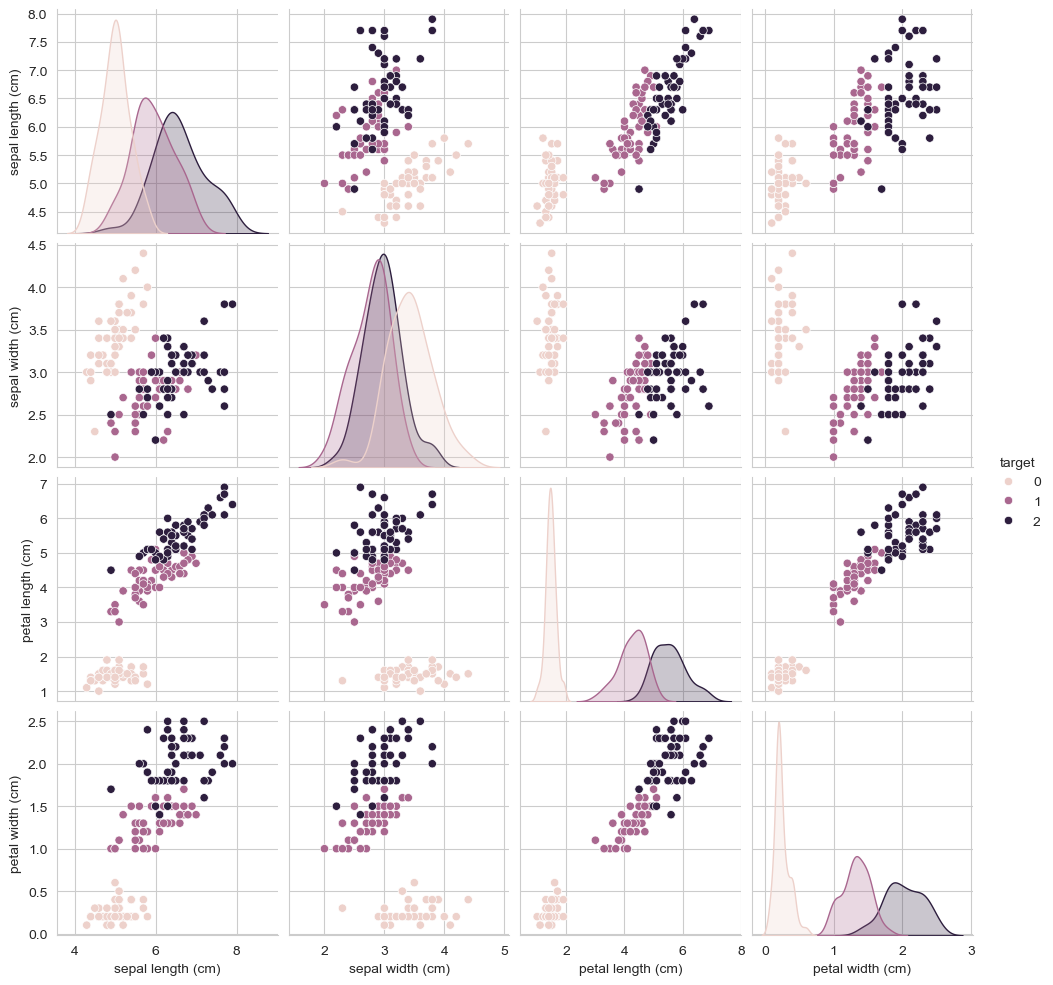

In [96]:
df = pd.DataFrame(iris.data, columns=iris.feature_names) 
df['target'] = iris.target

sns.pairplot(df, hue='target')

## Evaluating a clustering

Evaluating a clustering will depend if we already have labels for the observations or if we dont.

In [97]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix(iris.target, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

In case we dont have labels, we can still measure the quality of the clusters.

**Inertia** measures how spread out the clusters are (lower is better). Inertia can be understood as the distance from each sample to the centroid of its cluster. 

## Number of clusters

As we add more clusters to the clustering, inertia keeps dropping.
Elbow rule to pick the best number of clusters.


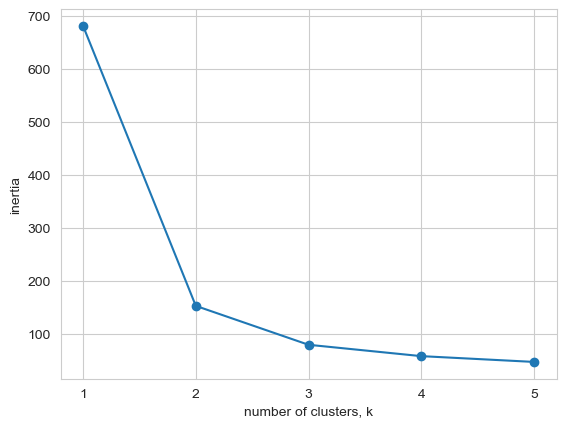

In [99]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    model.fit(iris.data)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Transforming features for better clusterings


In [100]:
wines = pd.read_csv('../data/wine.csv')
wines

class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0              1     Barolo    14.23        1.71  2.43               15.6   
1              1     Barolo    13.20        1.78  2.14               11.2   
2              1     Barolo    13.16        2.36  2.67               18.6   
3              1     Barolo    14.37        1.95  2.50               16.8   
4              1     Barolo    13.24        2.59  2.87               21.0   
..           ...        ...      ...         ...   ...                ...   
173            3    Barbera    13.71        5.65  2.45               20.5   
174            3    Barbera    13.40        3.91  2.48               23.0   
175            3    Barbera    13.27        4.28  2.26               20.0   
176            3    Barbera    13.17        2.59  2.37               20.0   
177            3    Barbera    14.13        4.10  2.74               24.5   

     magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0          127           2.80        3.06                  0.28   
1          100           2.65        2.76                  0.26   
2          101           2.80        3.24                  0.30   
3          113           3.85        3.49                  0.24   
4          118           2.80        2.69                  0.39   
..         ...            ...         ...                   ...   
173         95           1.68        0.61                  0.52   
174        102           1.80        0.75                  0.43   
175        120           1.59        0.69                  0.43   
176        120           1.65        0.68                  0.53   
177         96           2.05        0.76                  0.56   

     proanthocyanins  color_intensity   hue  od280  proline  
0               2.29             5.64  1.04   3.92     1065  
1               1.28             4.38  1.05   3.40     1050  
2               2.81             5.68  1.03   3.17     1185  
3               2.18             7.80  0.86   3.45     1480  
4               1.82             4.32  1.04   2.93      735  
..               ...              ...   ...    ...      ...  
173             1.06             7.70  0.64   1.74      740  
174             1.41             7.30  0.70   1.56      750  
175             1.35            10.20  0.59   1.56      835  
176             1.46             9.30  0.60   1.62      840  
177             1.35             9.20  0.61   1.60      560  

[178 rows x 15 columns]

In [101]:
wines.isna().sum()

class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64

In [102]:
wines.class_name.value_counts()

class_name
Grignolino    71
Barolo        59
Barbera       48
Name: count, dtype: int64

In [103]:
model = KMeans(n_clusters=3)

model.fit(wines[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
                 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
                 'color_intensity', 'hue', 'od280', 'proline']])
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [104]:
pd.crosstab(wines.class_name, model.labels_)

col_0        0   1   2
class_name            
Barbera      0  19  29
Barolo      46   0  13
Grignolino   1  50  20

The result doesnt look so great.

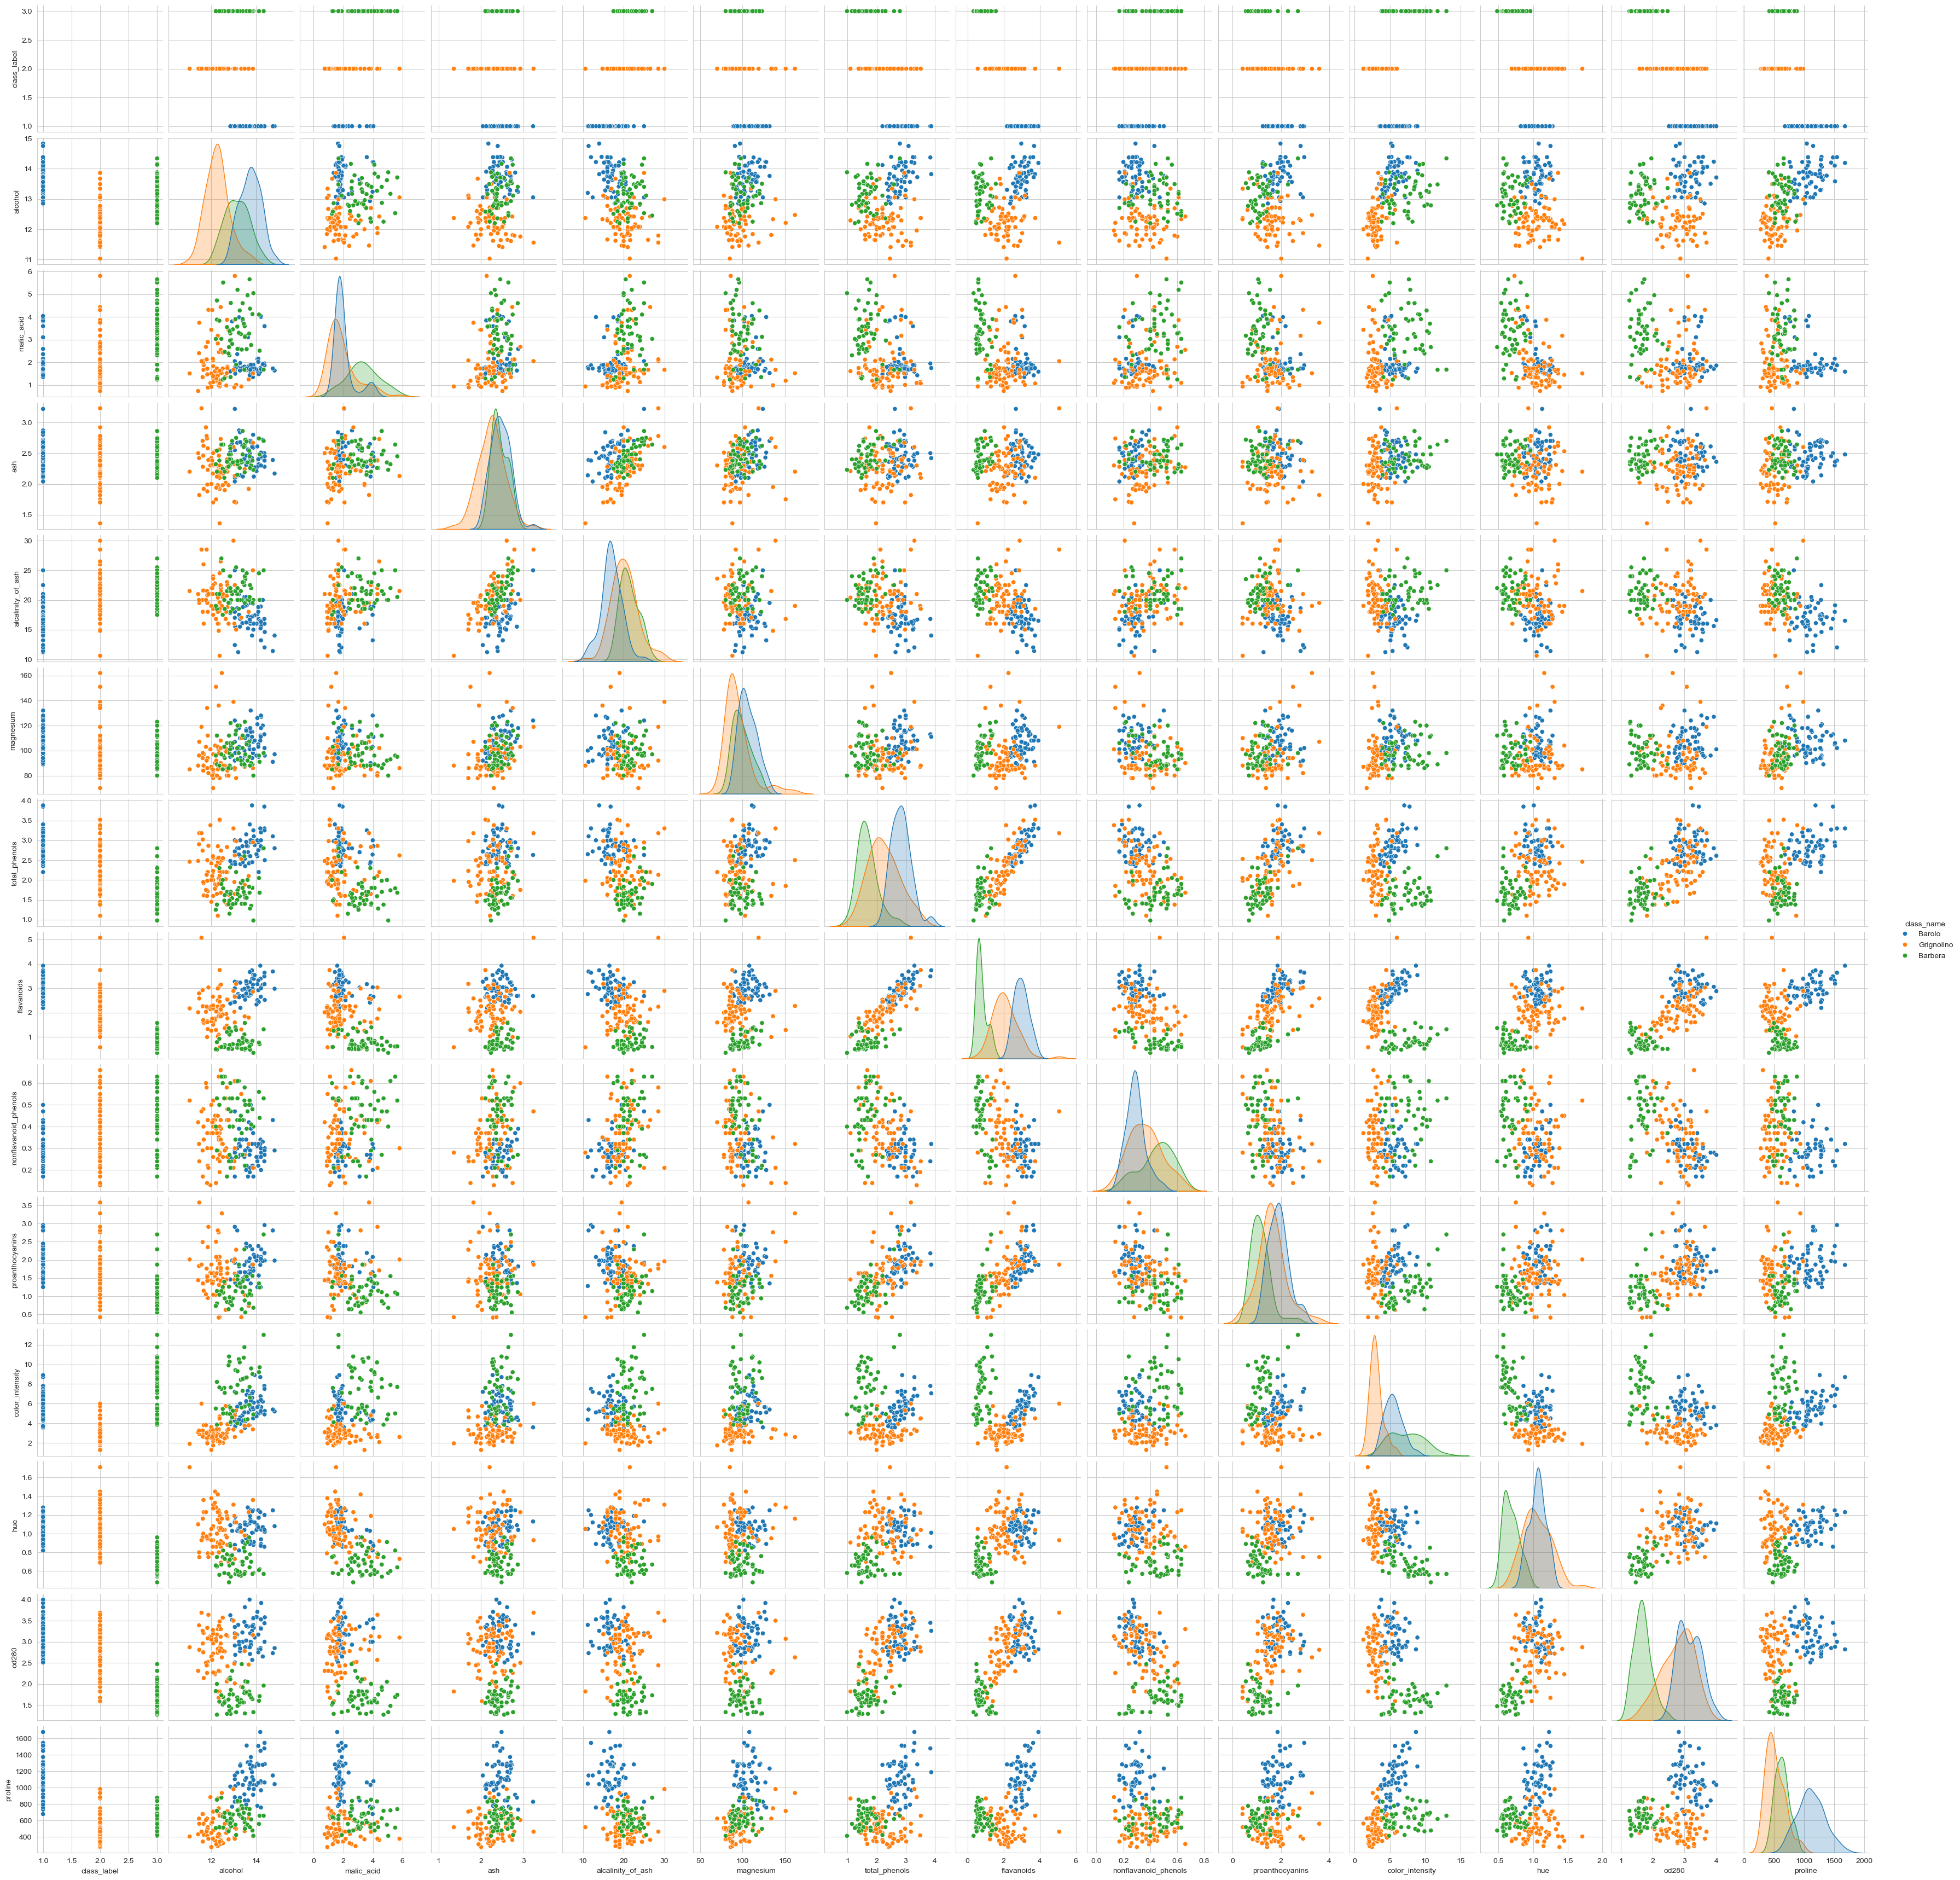

In [105]:
sns.pairplot(wines, hue='class_name')

In [106]:
wines.describe()

class_label     alcohol  malic_acid         ash  alcalinity_of_ash  \
count   178.000000  178.000000  178.000000  178.000000         178.000000   
mean      1.938202   13.000618    2.336348    2.366517          19.494944   
std       0.775035    0.811827    1.117146    0.274344           3.339564   
min       1.000000   11.030000    0.740000    1.360000          10.600000   
25%       1.000000   12.362500    1.602500    2.210000          17.200000   
50%       2.000000   13.050000    1.865000    2.360000          19.500000   
75%       3.000000   13.677500    3.082500    2.557500          21.500000   
max       3.000000   14.830000    5.800000    3.230000          30.000000   

        magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       proanthocyanins  color_intensity         hue       od280      proline  
count       178.000000       178.000000  178.000000  178.000000   178.000000  
mean          1.590899         5.058090    0.957449    2.611685   746.893258  
std           0.572359         2.318286    0.228572    0.709990   314.907474  
min           0.410000         1.280000    0.480000    1.270000   278.000000  
25%           1.250000         3.220000    0.782500    1.937500   500.500000  
50%           1.555000         4.690000    0.965000    2.780000   673.500000  
75%           1.950000         6.200000    1.120000    3.170000   985.000000  
max           3.580000        13.000000    1.710000    4.000000  1680.000000

Means and std vary a lot from feature to feature. Lets try scaling and standardizing them.

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
wines_scaled = scaler.fit_transform(wines[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
                 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
                 'color_intensity', 'hue', 'od280', 'proline']])

model = KMeans(n_clusters=3)

model.fit(wines_scaled)

pd.crosstab(model.labels_, wines.class_name)


class_name  Barbera  Barolo  Grignolino
row_0                                  
0                48       0           1
1                 0      59           8
2                 0       0          62

## Unsupervised Visualizing Techniques

### Visualizing hierarchies

Hierarchical clustering helps organizing samples in hierarchies.



In [108]:
eurovision = pd.read_csv('../data/eurovision-2016.csv')
eurovision

From country       To country  Jury A  Jury B  Jury C  Jury D  Jury E  \
0            Albania          Belgium      20      16      24      22      24   
1            Albania   Czech Republic      21      15      25      23      16   
2            Albania  The Netherlands      22      14      23      24      21   
3            Albania       Azerbaijan      19      12      11      21      11   
4            Albania          Hungary       8      13       9      14       9   
...              ...              ...     ...     ...     ...     ...     ...   
1061  United Kingdom          Ukraine      11       1       1       1       5   
1062  United Kingdom            Malta      18      13       8      17       4   
1063  United Kingdom          Georgia       2       2       3       2       1   
1064  United Kingdom          Austria      23      15      12      18      13   
1065  United Kingdom          Armenia      15      22       7      24      18   

      Jury Rank  Televote Rank  Jury Points  Televote Points  
0            25             14          NaN              NaN  
1            22             22          NaN              NaN  
2            24             24          NaN              NaN  
3            13             19          NaN              NaN  
4            10             10          1.0              1.0  
...         ...            ...          ...              ...  
1061          2              6         10.0              5.0  
1062         12             15          NaN              NaN  
1063          1             19         12.0              NaN  
1064         17             13          NaN              NaN  
1065         20             18          NaN              NaN  

[1066 rows x 11 columns]

Hierarchical clustering can be *agglomerative* when starting with one cluster for element and combining them little by little or *divisive*, who starts with one single cluster and split it step by step.


In [109]:
samples=[[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]]

In [110]:
varieties=['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

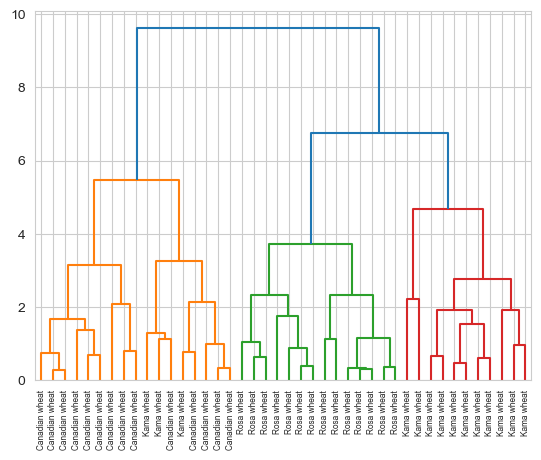

In [111]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method="complete")

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()



The intermediate clusters and the height on a dendrogram can be useful too.

The height on a dendrogram is the distance between merging clusters.

The distance between clusters is defined by the linkage method.

In complete linkage the distance between clusters is the max distance between their samples. 

The cluster lables for any intermediate level can be retrieved by the fcluster() function.


In [112]:
from scipy.cluster.hierarchy import fcluster

mergings = linkage(samples, method="complete")

labels = fcluster(mergings, 5, criterion='distance')

print(labels)

[4 4 4 4 4 2 4 4 2 4 4 4 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 2 1 1 1 1 1
 1 2 1 2 2]


In [113]:
ct = pd.crosstab(labels, varieties)

In [114]:
ct

col_0  Canadian wheat  Kama wheat  Rosa wheat
row_0                                        
1                   9           0           0
2                   5           3           0
3                   0           0          14
4                   0          11           0

## t-SNE (t-distributed Stochastic Neighbor Embedding)

Maps samples to 2D (or 3d) spaces

Map approximately preserves nearness of samples

Great for inspecting datasets



<Axes: >

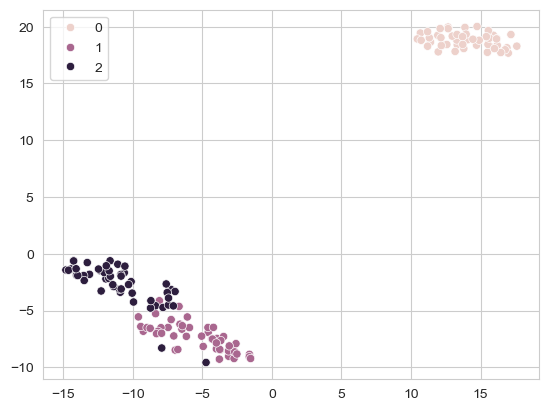

In [115]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)

transformed = model.fit_transform(iris.data) 
xs = transformed[:,0]
ys = transformed[:,1] 
sns.scatterplot(x=xs, y=ys, hue=iris.target)

TSNE doesnt have fit and transform separate methods, so each time we want to perform a TSNE thingy we have to start from scratch.

The learning_rate in TSNE can lead to all the datapoint sitting together in the scatterplot. Normally its enough trying few values between 50 and 200.

The axis on the tsne representation dont have any interpretation.

## Dimension Reduction

Finds patterns in data and use them to express the data in a compressed form.

### Principal Component Analysis (PCA)

Its the a fundamental dimension reduction technique. First of all it:
- Rotates data samples to be aligned with axes -> decorrelates data
- Shifts data samples so they have mean 0
- No information is lost.

The PCA implementation in scikit learn follows the fit/transform pattern.

Principal Components refers to the directions in the n-dimensional space of the observations where the variance changes the most.


In [117]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(wine)
pca_samples = model.transform(wine)

model.components_

NameError: name 'wine' is not defined